# Overview
This notebook was created to save my notes of the Signal processing book [ThinkDSP](https://greenteapress.com/thinkdsp/thinkdsp.pdf), available on this great [github repository](https://github.com/AllenDowney/ThinkDSP)

# chapter_1
## periodic signals
* a signal is abstractly a quantity that varies with time. It ranges from mechanical vibrations, electrical signals to sounds. Let's go through the basics here:
1. a function is referred to as periodic if we have $f(x + T) = f(x)$ for all values of $x$ in the of the function $f$. 
2. signal functions are usually sinusoid functions: more informally having the same shape as the $sin(x)$ function
3. The shape of a periodic function is called **waveform**. The latter determines the **timbre**: also known as the quality of the sound.
## spectral decomposition
1. The **spectral decomposition** is the process of expressing any signal through ***cos*** and ***sin*** functions with different frequencies.
2. The ***discreate Fourrier*** produces the spectrum using the ***Fourier Transform***
3. The lowest frequency component is called the ***fundamental frequency***
4. The harmonics of a component is a component whose frequency is multiple of the original component

* The book uses the ThinkDSP module. The latter provides classes to present the notion of a ***signal***. which can be defined by its: frequency, amplitude and offset (also known as phase).
* A Signal object is practically useless until evaluated. The latter means, it is associated with a sequence of values $t_s$ and each one of them is evaluated. These different values are encapsulated in **Wave** object. Each point (t_s, Signal(t_s)) is referred to as a ***frame***. The entire process is sometimes referred to as a ***sample***
* 

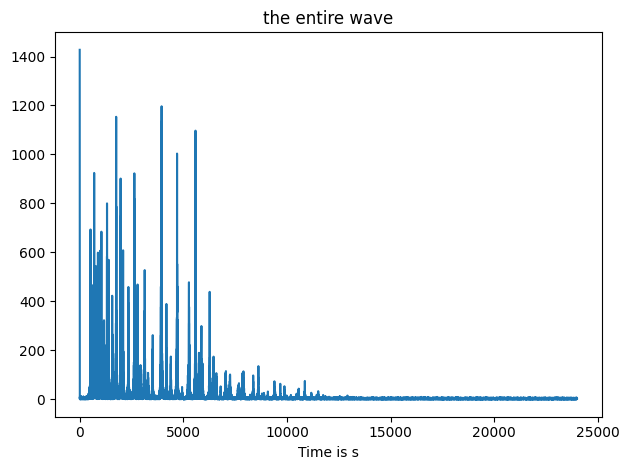

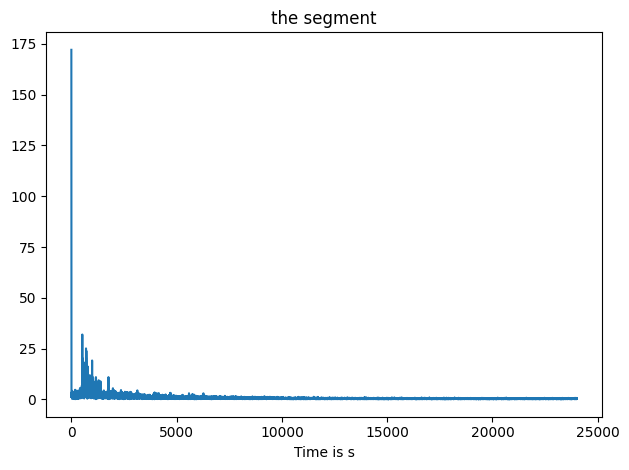

In [18]:
# EX 1.2
from thinkdsp import read_wave
from thinkdsp import decorate
import matplotlib.pyplot as plt

# first read the wave from the magic file downloaded
wave = read_wave('magic_sound.wav') 
# create its spectrum
wave_spec = wave.make_spectrum()
wave_spec.plot()
decorate(xlabel='Time is s', title='the entire wave')
plt.show()

# create a segment where the pitch is more or less constant
seg = wave.segment(duration=0.5, start=3.6)
seg_spec = seg.make_spectrum()
seg_spec.plot()
decorate(xlabel='Time is s', title='the segment')
plt.show() 
# the less harmonic the segments are (the more complex the sound is...), the better the timber is 
# let's repeat but this time with filtering

fil_wave = wave.make_spectrum()
# filter
fil_wave.low_pass(3000)
# convert to a wave object
filtered = fil_wave.make_wave()

In [19]:
# let's listen to the audio with and without a filter
wave.make_audio()

In [20]:
filtered.make_audio()

In [21]:
# let's try with high pass
fil_wave_2 = wave.make_spectrum()
fil_wave_2.high_pass(3000)
filtered_2 = fil_wave_2.make_wave()
filtered_2.make_audio()
# high pass makes the sound more acute (keeping the high pitch..)
#  

In [24]:
# let's explore a bit more with the idea of harmonics and fundamental frequency
from thinkdsp import SinSignal
from thinkdsp import CosSignal

sin = SinSignal(freq=440, amp=1, offset=0) # let's focus on frequencies for now
cos = SinSignal(freq=440, amp=1, offset=0) 

m = sin + cos
# let's mix things for real
m1 = m + SinSignal(880, 1, 0) + CosSignal(1320, 1, 0)
m2 = m + SinSignal(600, 1, 0) + CosSignal(1200, 1, 0)

w1 = m1.make_wave(duration=1, framerate=11025)
w2 = m2.make_wave(duration=1, framerate=11025)
# let's check it out!! 
w1.make_audio()

In [25]:
w2.make_audio()

In [ ]:
# I don't know about you but I can see the heterogeny in the second audio. Interesting isn't

In [49]:
from copy import copy
from thinkdsp import Wave
def modify(wave: Wave, factor):
    new_wave = copy(wave)
    new_wave.ts *= factor
    new_wave.framerate /= factor
    return new_wave

wave = read_wave('magic_sound.wav') 
stretched_wave = modify(wave, 2)
# let's first listen to the original audio 
wave.make_audio()


In [50]:
stretched_wave.make_audio()

In [51]:
speeded_wave = modify(wave, 0.5)
speeded_wave.make_audio()